In [73]:
from scipy.io import netcdf
import numpy as np

In [74]:
import xarray as xr  #libraries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import os
import requests
import concurrent.futures
%matplotlib inline

In [75]:
import numpy as np
import xarray as xr
from os.path import join,expanduser
import matplotlib.pyplot as plt
import ecco_access as ea

# identify user's home directory
user_home_dir = expanduser('~')

In [76]:
help(ea.ecco_podaac_to_xrdataset)

Help on function ecco_podaac_to_xrdataset in module ecco_access.ecco_access:

ecco_podaac_to_xrdataset(query, version='v4r4', grid=None, time_res='all', StartDate=None, EndDate=None, snapshot_interval=None, mode='download_ifspace', download_root_dir=None, **kwargs)
    This function queries and accesses ECCO datasets from PO.DAAC. The core query and download functions
    are adapted from Jupyter notebooks created by Jack McNelis and Ian Fenty
    (https://github.com/ECCO-GROUP/ECCO-ACCESS/blob/master/PODAAC/Downloading_ECCO_datasets_from_PODAAC/README.md)
    and modified by Andrew Delman (https://ecco-v4-python-tutorial.readthedocs.io).
    It is similar to ecco_podaac_access, except instead of a list of URLs or files,
    an xarray Dataset with all of the queried ECCO datasets is returned.

    Parameters
    ----------
    query: str, list, or dict, defines datasets or variables to access.
           If query is str, it specifies either a dataset ShortName (if query
           matc

In [77]:
from netrc import netrc
from subprocess import Popen
from platform import system
from getpass import getpass
import os

In [5]:
# Earthaccess info:

In [110]:
urs = 'urs.earthdata.nasa.gov'    # Earthdata URL endpoint for authentication
prompts = ['Enter NASA Earthdata Login Username: ',
           'Enter NASA Earthdata Login Password: ']

# Determine the OS (Windows machines usually use an '_netrc' file)
netrc_name = "_netrc" if system()=="Windows" else ".netrc"

# Determine if netrc file exists, and if so, if it includes NASA Earthdata Login Credentials
try:
    netrcDir = os.path.expanduser(f"~/{netrc_name}")
    netrc(netrcDir).authenticators(urs)[0]

# Below, create a netrc file and prompt user for NASA Earthdata Login Username and Password
except FileNotFoundError:
    homeDir = os.path.expanduser("~")
    Popen('touch {0}{2} | echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=True)
    Popen('echo login {} >> {}{}'.format(getpass(prompt=prompts[0]), homeDir + os.sep, netrc_name), shell=True)
    Popen('echo \'password {} \'>> {}{}'.format(getpass(prompt=prompts[1]), homeDir + os.sep, netrc_name), shell=True)
    # Set restrictive permissions
    Popen('chmod 0600 {0}{1}'.format(homeDir + os.sep, netrc_name), shell=True)

    # Determine OS and edit netrc file if it exists but is not set up for NASA Earthdata Login
except TypeError:
    homeDir = os.path.expanduser("~")
    Popen('echo machine {1} >> {0}{2}'.format(homeDir + os.sep, urs, netrc_name), shell=True)
    Popen('echo login {} >> {}{}'.format(getpass(prompt=prompts[0]), homeDir + os.sep, netrc_name), shell=True)
    Popen('echo \'password {} \'>> {}{}'.format(getpass(prompt=prompts[1]), homeDir + os.sep, netrc_name), shell=True)

In [111]:
pip install podaac-data-subscriber

Note: you may need to restart the kernel to use updated packages.


In [118]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [119]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Tile 7 (Alaska Study area)

In [120]:
# load grid file, generic command:
grid_shortname = 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4'
ds_grid = ea.ecco_podaac_to_xrdataset(grid_shortname,\
                                      mode='download',\
                                      download_root_dir=join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')).compute()

# find llc90 tiles in given bounding box
def llc90_tiles_find(ds_grid,latsouth,latnorth,longwest,longeast):
    lat_llc90 = ds_grid.YC.values
    lon_llc90 = ds_grid.XC.values

    cells_in_box = np.logical_and(np.logical_and(lat_llc90 >= latsouth,lat_llc90 <= latnorth),\
                                  ((lon_llc90 - longwest - 1.e-5) % 360) <= (longeast - longwest - 1.e-5) % 360)
    cells_in_box_tile_ind = cells_in_box.nonzero()[0]
    tiles_in_box = np.unique(cells_in_box_tile_ind)

    return tiles_in_box


# find tiles in North Pacific
longwest = -180
longeast = -165
latsouth = 52
latnorth = 70

tiles_N_Pac = llc90_tiles_find(ds_grid,latsouth,latnorth,longwest,longeast)
print('North Pacific tiles: '+str(tiles_N_Pac))

created download directory C:\Users\Nodiscontinuity\Downloads\ECCO_V4r4_PODAAC\ECCO_L4_GEOMETRY_LLC0090GRID_V4R4

GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|###################################| 1/1 [00:00<?, ?it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s
Time spent = 0.017676591873168945 seconds


North Pacific tiles: [7]


In [ ]:
#Explore Dataframes to weight monthly data by days

In [35]:
#import ecco_v4_py as ecco
#from os.path import join
#import os

#user_home_dir = os.path.expanduser("~") #get user home directory

Salinity_flux_monthly_shortname = 'ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4'
ds_Sal_flux = ea.ecco_podaac_to_xrdataset(Salinity_flux_monthly_shortname,
                                        StartDate='2017-01', EndDate='2017-12',
                                        mode='download',
                                        download_root_dir=join(user_home_dir, 'Downloads', 'ECCO_V4r4_PODAAC'))



# Access the salinity fields (SALT)
salinity_flux = ds_Sal_flux.ADVr_SLT

created download directory C:\Users\Nodiscontinuity\Downloads\ECCO_V4r4_PODAAC\ECCO_L4_OCEAN_3D_SALINITY_FLUX_LLC0090GRID_MONTHLY_V4R4


C:\Users\Nodiscontinuity\Downloads\ecco_access\ecco_download.py:126: UserWarning: no explicit representation of timezones available for np.datetime64
  time_start = np.append(time_start,np.datetime64(curr_entry['time_start'],'ns'))



OCEAN_3D_SALINITY_FLUX_mon_mean_2017-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-07_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean_2017-08_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_3D_SALINITY_FLUX_mon_mean

(5, 50, 13, 90, 90)
(5, 50, 90, 90)
(5, 90, 90)

Weighted DataFrame:
 

C:\Users\Nodiscontinuity\AppData\Local\Temp\ipykernel_19380\627301333.py:10: RuntimeWarning: Mean of empty slice
  salinity_flux_seasonal_Bering_vert = np.nanmean(salinity_flux_seasonal_Bering, axis=1) #Take vertical mean for each month, in tile #7


                                                 monthly_data  days_in_month  \
2017-04-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             30   
2017-05-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             31   
2017-06-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...             30   

                                                weighted_data  
2017-04-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  
2017-05-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  
2017-06-01  [[nan, nan, nan, nan, nan, nan, nan, nan, nan,...  

Weighted Mean: [[             nan              nan              nan ... -164602.2967033
   -90617.69230769  310277.64835165]
 [             nan              nan              nan ... -176372.62637363
    23623.37362637  286280.43956044]
 [             nan              nan              nan ... -309822.02197802
    -2703.06593407  119724.76923077]
 ...
 [             nan              nan              nan ... -672631.29670

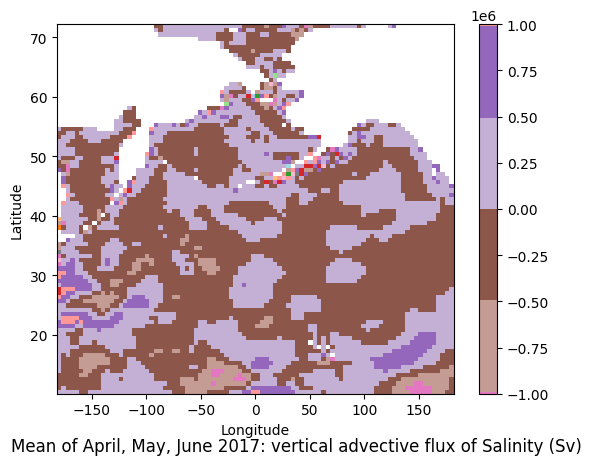

In [128]:

tile_num = 7 #(Study area in Alaska)

# Select data for the specified tile

# Select March to September (months without full ice in Bering Strait)
salinity_flux_seasonal = ds_Sal_flux.ADVr_SLT.sel(time=ds_Sal_flux.time.dt.month.isin(range(4, 9)))  # Select months 4 to 9
print(salinity_flux_seasonal.shape)#check size of array
salinity_flux_seasonal_Bering=salinity_flux_seasonal.sel(tile=tile_num).values #pick tile 7
print(salinity_flux_seasonal_Bering.shape) #check size of array after narrowing down to tile 7
salinity_flux_seasonal_Bering_vert = np.nanmean(salinity_flux_seasonal_Bering, axis=1) #Take vertical mean for each month, in tile #7
print(salinity_flux_seasonal_Bering_vert.shape) #Check array shape after taking vertical mean

#weight months
#(Try calculation for thre months' worth of data, named them for clarity, but not necessary:)
April =salinity_flux_seasonal_Bering_vert[1, 0:90, 0:90]  # elements of the first layer
May =salinity_flux_seasonal_Bering_vert[2, 0:90, 0:90] #  elements of the second layer.
June =salinity_flux_seasonal_Bering_vert[3, 0:90, 0:90] # elements of the last layer.

# Example monthly data: April, May, June 
monthly_values = ([April, May, June]);

year = 2017
months = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS');
df = pd.DataFrame({'monthly_data': monthly_values}, index=months)
def weight_monthly_data(df, year):
    
#"""Weights monthly data by the number of days in each month."""
    def days_in_month(year):
       # """Calculates the number of days in each month."""
        date_range = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS');
        days = date_range.days_in_month.values;
        return days;

    days = days_in_month(year);
    df['days_in_month'] = days;
    df['weighted_data'] = df['monthly_data'] * (df['days_in_month'] / df['days_in_month'].sum());
    return df;

# Apply weighting
weighted_df = weight_monthly_data(df.copy(), year);  # use copy() to avoid altering original dataframe
print("\nWeighted DataFrame:\n", weighted_df)

# Calculate the mean of the weighted data
def calculate_weighted_mean(df, year):
    def days_in_month(year):
        date_range = pd.date_range(start=f'{year}-04-01', periods=3, freq='MS')
        days = date_range.days_in_month.values
        return days

    days = days_in_month(year)
    df['days_in_month'] = days
    df['weighted_values'] = df['monthly_data'] * df['days_in_month']
    weighted_mean = df['weighted_values'].sum() / df['days_in_month'].sum()
    return weighted_mean

weighted_mean = calculate_weighted_mean(df.copy(), year)

print("\nWeighted Mean:", weighted_mean)
print(weighted_mean.shape)

lons_salx = salinity_flux.XC.sel(tile=tile_num).values
lats_salx = salinity_flux.YC.sel(tile=tile_num).values

data_rotated_salx = np.rot90(weighted_mean, k=1)#rotate tile 7 data
#print(data_rotated_sal)
ny_sx, nx_sx=data_rotated_salx.shape
print(data_rotated_salx.shape)
lons_rotated_sx = np.linspace(lons_salx.min(), lons_salx.max(), nx_sx)#interpolate XC and YC grids
lats_rotated_sx= np.linspace(lats_salx.min(), lats_salx.max(), ny_sx)
nx_sx, ny_sx= np.meshgrid(lons_rotated_sx, lats_rotated_sx)

plt.figure()

mesh = plt.pcolormesh(lons_rotated_sx, lats_rotated_sx,data_rotated_salx, cmap='tab20_r', norm=mcolors.CenteredNorm()) #centered norm (split colorbar around '0')

colorbar = plt.colorbar(mesh)
# Add axis labels
plt.xlabel('Longitude')  # Replace with your specific longitude units if needed
plt.ylabel('Latitude')  # Replace with your specific latitude units if needed

# Add a title
plt.suptitle('Mean of April, May, June 2017: vertical advective flux of Salinity (Sv)',y=0.02)  # 

colorbar.ax.set_ylim(-1e6, 1e6) #Sets the colorbar limits (SV)
plt.show()